In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt

In [4]:
training = pd.read_csv('Train.csv')
testing  = pd.read_csv('Test.csv')
# saving the information of columns
cols     = training.columns
cols     = cols[:-1]
# Slicing and Dicing the dataset to separate features from predictions
x        = training[cols]
y        = training['prognosis']
y1       = y

In [5]:
reduced_data = training.groupby(training['prognosis']).max()

In [6]:
# encoding/mapping String values to integer constants
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Splitting-the-dataset-into-training-set-and-test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# print(x_test)
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)
#greetings
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]


In [7]:
#implement the Decision-Tree-Classifier
clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
# checking the Important features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

def greeting(sentence):
    """If user's input is a greeting, return a greeting response"""
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return disease

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    symptoms_present = []
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]  #storing disease name from the file
            threshold = tree_.threshold[node]
#             print(threshold)
            print("Healtho: "+ name + " ?")
            ans = input()
            ans = ans.lower()
            if ans == 'yes':
                val = 1
            elif ans == 'no':
                val = 0
            else:
                print("Healtho: I am sorry! I don't understand you")
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            
            present_disease = print_disease(tree_.value[node])
            for di in present_disease:
                diss=di
            for i in symptoms_present:
                dis=i
            print( "Healtho: You may have " +diss)
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            print("Healtho: symptoms present " +dis)
            indexx=np.arange(1,len(symptoms_given)+1)
            data=pd.DataFrame(list(symptoms_given),index=[indexx],columns=['OTHER SYMPTOMS'])
            print(data)
            import csv
            f=open('consultancy.csv','r')
            read=csv.reader(f)
            consult={}
            consult_doc=[' YES','NO']
            
            for row in read:
                consult[row[0]]=int(row[1]) #converting csv to dictionary
            if(consult[diss]>50):
                    print("Healtho: You should consult a doctor as soon as possible")
                    data1=[consult[diss],0]
                    plt.ylim([0,100])
                    plt.bar(consult_doc,data1,align='center',color='red',width=0.15)
                    plt.ylabel('Risk')
                    plt.xlabel('Consult a doctor')
                    plt.show()
                    
            else:
                print("Healtho: You may consult a doctor")
                data1=[0,consult[diss]]
                plt.ylim([0,100])
                plt.bar(consult_doc,data1,align='center',color='red',width=0.15)
                plt.ylabel('Risk')
                plt.xlabel('Consult a doctor')
                plt.show()
                
            
    recurse(0, 1)


Healtho: My name is Healtho. I will answer your queries about your health related problem. If you want to exit, type Bye!
hi
Healtho: hey
Healtho: Please reply Yes or No for the following symptoms
Healtho: runny_nose ?
no
Healtho: internal_itching ?
no
Healtho: hip_joint_pain ?
no
Healtho: polyuria ?
no
Healtho: inflammatory_nails ?
no
Healtho: enlarged_thyroid ?
yes
Healtho: You may have Hypothyroidism
Healtho: symptoms present enlarged_thyroid
           OTHER SYMPTOMS
1                 fatigue
2             weight_gain
3    cold_hands_and_feets
4             mood_swings
5                lethargy
6               dizziness
7     puffy_face_and_eyes
8        enlarged_thyroid
9           brittle_nails
10    swollen_extremeties
11             depression
12           irritability
13  abnormal_menstruation
Healtho: You should consult a doctor as soon as possible


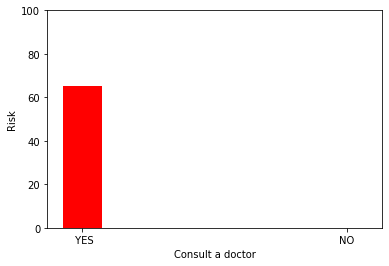

In [ ]:
flag=True
print("Healtho: My name is Healtho. I will answer your queries about your health related problem. If you want to exit, type Bye!")
while(flag==True):
    
    user_response=input()
    user_response=user_response.lower()
     
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("Healtho: You are welcome..")
       
        else:
            if(greeting(user_response)!=None):
                print("Healtho: "+greeting(user_response))
                print("Healtho: Please reply Yes or No for the following symptoms")
                tree_to_code(clf,cols)
            else:
                print("Healtho: I am sorry! I don't understand you")
                flag=True
                
    else:
        flag=False
        print("Healtho: Bye! take care..")    